This is separate from all other processing; just to give a sense of what the frequency content of the eeg data looks like. Don't use the previously imported and filtered data. Redo those steps here

# Import all necessary packages

In [5]:
from bci_essentials.bci_data import EEG_data
from bci_essentials.signal_processing import bandpass
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# Import and filter EEG data using BCIEssentials

In [6]:
# Initialize data object
ssvep_data = EEG_data()

file_name = "E:\ES_Pilot\sub-P005\ses-S002\eeg\sub-P005_ses-S002_task-T1_run-001_eeg.xdf"

# Load the XDF file into an EEG_data object
ssvep_data.load_offline_eeg_data(filename  = file_name, print_output=False)
raw_eeg = ssvep_data.eeg_data
timestamps = ssvep_data.eeg_timestamps - ssvep_data.eeg_timestamps[0]

# Bandpass filter between 1 and 40 Hz
bp_filt_eeg = bandpass(raw_eeg.T, 4, 40, 5, ssvep_data.fsample).T

O1_eeg = bp_filt_eeg[:, ssvep_data.channel_labels.index('O1')]
O2_eeg = bp_filt_eeg[:, ssvep_data.channel_labels.index('O2')]
Oz_eeg = bp_filt_eeg[:, ssvep_data.channel_labels.index('Oz')]


Response data not available


# Visualize spectrograms

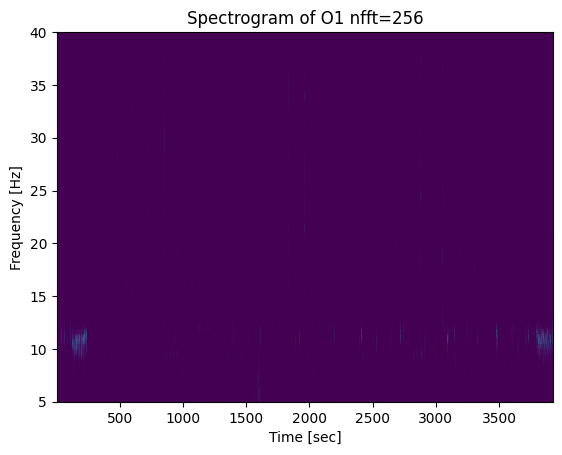

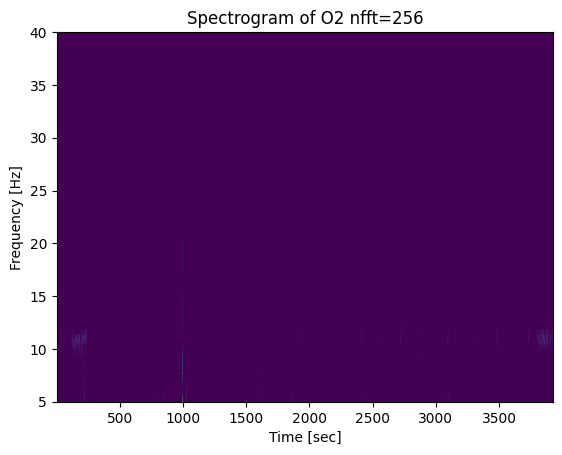

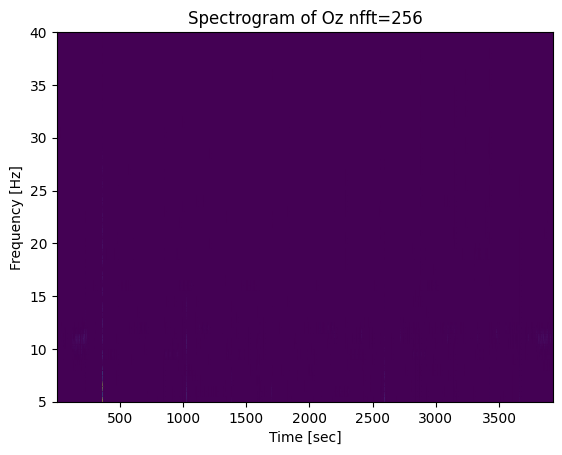

In [7]:
f, t, Sxx_O1 = spectrogram(O1_eeg, fs=ssvep_data.fsample, nperseg=512, noverlap=0)
plt.pcolormesh(t, f, Sxx_O1, shading='gouraud')
plt.title('Spectrogram of O1 nfft=256')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([5, 40])
plt.show()

f, t, Sxx_O2 = spectrogram(O2_eeg, fs=ssvep_data.fsample, nperseg=512, noverlap=0)
plt.title('Spectrogram of O2 nfft=256')
plt.pcolormesh(t, f, Sxx_O2, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([5, 40])
plt.show()

f, t, Sxx_Oz = spectrogram(Oz_eeg, fs=ssvep_data.fsample, nperseg=512, noverlap=0)
plt.title('Spectrogram of Oz nfft=256')
plt.pcolormesh(t, f, Sxx_Oz, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([5, 40])
plt.show()